# 02 EDA and Descriptive Statistics

## Objectives

- Explore distributions and trends
- Produce summary statistics for dashboard context
- Create export-ready tables if needed

## Inputs

- data/processed/v1/environmental_trends_clean.csv

## Outputs

- EDA visuals and summary tables (embedded in notebook)

## Additional Comments

- Keep interpretations cautious and avoid causal claims

## Notebook layout

- Section 1: Setup and load processed data
- Section 2: Descriptive statistics
- Section 3: Trend checks
- Section 4: Correlation scan

## Purpose and Context

This notebook performs Exploratory Data Analysis to understand patterns, distributions, and relationships in our environmental data before formal hypothesis testing or modeling.

The connection to project guidelines is clear. For communication, visualizations and summary statistics help us reach both technical and non-technical audiences. For ethics, cautious interpretation of correlations prevents overconfident causal claims. For documentation, embedded visualizations and explanations make the analysis transparent.

The key principle throughout this notebook is that association does not equal causation. We'll identify patterns and associations in the data. However, correlation does not prove one variable causes changes in another. Many confounding factors affect climate including geography, economics, and policy. We communicate findings as "associated with" rather than "caused by."

This responsible approach ensures our dashboard doesn't mislead users about what the data can and cannot tell us.

---

## Section 1 - Setup and load processed data

We set the project root as the working directory and load the cleaned dataset for analysis.

# Change working directory

Notebooks are stored in the `jupyter_notebooks/` subfolder. This cell checks the current working directory and navigates to the project root (`global_env_trend/`) if needed, ensuring relative paths to `data/` work correctly.

In [1]:
import os
from pathlib import Path

# Navigate to project root - portable approach that works on any clone
current = Path.cwd()

if not (current / "data" / "processed" / "v1").exists():
    if (current.parent / "data" / "processed" / "v1").exists():
        os.chdir(current.parent)

print(f"Working directory: {os.getcwd()}")

Working directory: c:\Users\sergi\OneDrive\Documents\Code Institute Data analytics\Capstone project 3\Global_environmental_trends_2000_2024\global_env_trend


# Load processed data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

clean_path = "data/processed/v1/environmental_trends_clean.csv"
df = pd.read_csv(clean_path)
print(f"Loaded {len(df)} rows × {len(df.columns)} columns")
print(f"Countries: {df['Country'].nunique()} | Years: {df['Year'].min()}–{df['Year'].max()}")
df.head()

Loaded 114 rows × 10 columns
Countries: 19 | Years: 2000–2024


,Year,Country,Avg_Temperature_degC,CO2_Emissions_tons_per_capita,Sea_Level_Rise_mm,Rainfall_mm,Population,Renewable_Energy_pct,Extreme_Weather_Events,Forest_Area_pct
0,2000,United States,13.5,20.2,0,715,282500000,6.2,38,33.1
1,2000,China,12.8,2.7,0,645,1267000000,16.5,24,18.8
2,2000,Germany,9.3,10.1,0,700,82200000,6.6,12,31.8
3,2000,Brazil,24.9,1.9,0,1760,175000000,83.7,18,65.4
4,2000,Australia,21.7,17.2,0,534,19200000,8.8,11,16.2


**What this code does:**

Loads the cleaned dataset into a DataFrame and previews the first rows to confirm the schema and data types.

## Section 2 - Descriptive statistics

We summarize numeric and categorical features to understand typical values, ranges, and variability.

# Summary statistics

**What summary statistics reveal:**

The describe method provides key statistical measures for each numeric variable. Count shows how many valid (non-missing) values exist. Mean gives us the average value, which is useful for understanding typical levels. Standard deviation shows how much variation exists, where high standard deviation means more variability. Min and max reveal the range of values, helping identify outliers or data errors. The quartiles at 25%, 50%, and 75% show the distribution shape, telling us whether data is skewed or symmetric.

Why this matters for our project is that understanding distributions helps us identify countries or years with unusual values, choose appropriate visualizations (such as histograms for skewed data), and set realistic expectations for model performance.

In [3]:
# Full summary statistics (no truncation)
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,114.0,NaN,NaN,NaN,2012.333333,8.336578,2000.0,2005.0,2012.5,2020.0,2024.0
Country,114,19,United States,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avg_Temperature_degC,114.0,NaN,NaN,NaN,17.145614,6.840822,5.1,13.025,15.0,24.65,28.5
CO2_Emissions_tons_per_capita,114.0,NaN,NaN,NaN,8.038596,5.362596,0.5,3.825,7.6,11.1,20.2
Sea_Level_Rise_mm,114.0,NaN,NaN,NaN,25.114035,17.698437,0.0,10.0,24.0,36.75,59.0
Rainfall_mm,114.0,NaN,NaN,NaN,954.017544,575.770864,54.0,589.75,761.0,1192.0,2726.0
Population,114.0,NaN,NaN,NaN,233460622.605263,379250543.364876,19200000.0,49915000.0,82300000.0,202375000.0,1426000000.0
Renewable_Energy_pct,114.0,NaN,NaN,NaN,28.407018,24.778547,0.0,10.625,19.1,41.35,85.6
Extreme_Weather_Events,114.0,NaN,NaN,NaN,20.350877,11.832894,2.0,12.0,18.0,25.0,64.0
Forest_Area_pct,114.0,NaN,NaN,NaN,32.751754,18.920164,0.5,17.5,32.95,46.5,68.5


## Section 3 - Trend checks

We visualize how key metrics move over time to inform dashboard narratives.

# Distribution plots

**Why distributions matter:** Histograms and box plots reveal whether variables are normally distributed, skewed, or have outliers. This informs which statistical tests are appropriate in later notebooks.

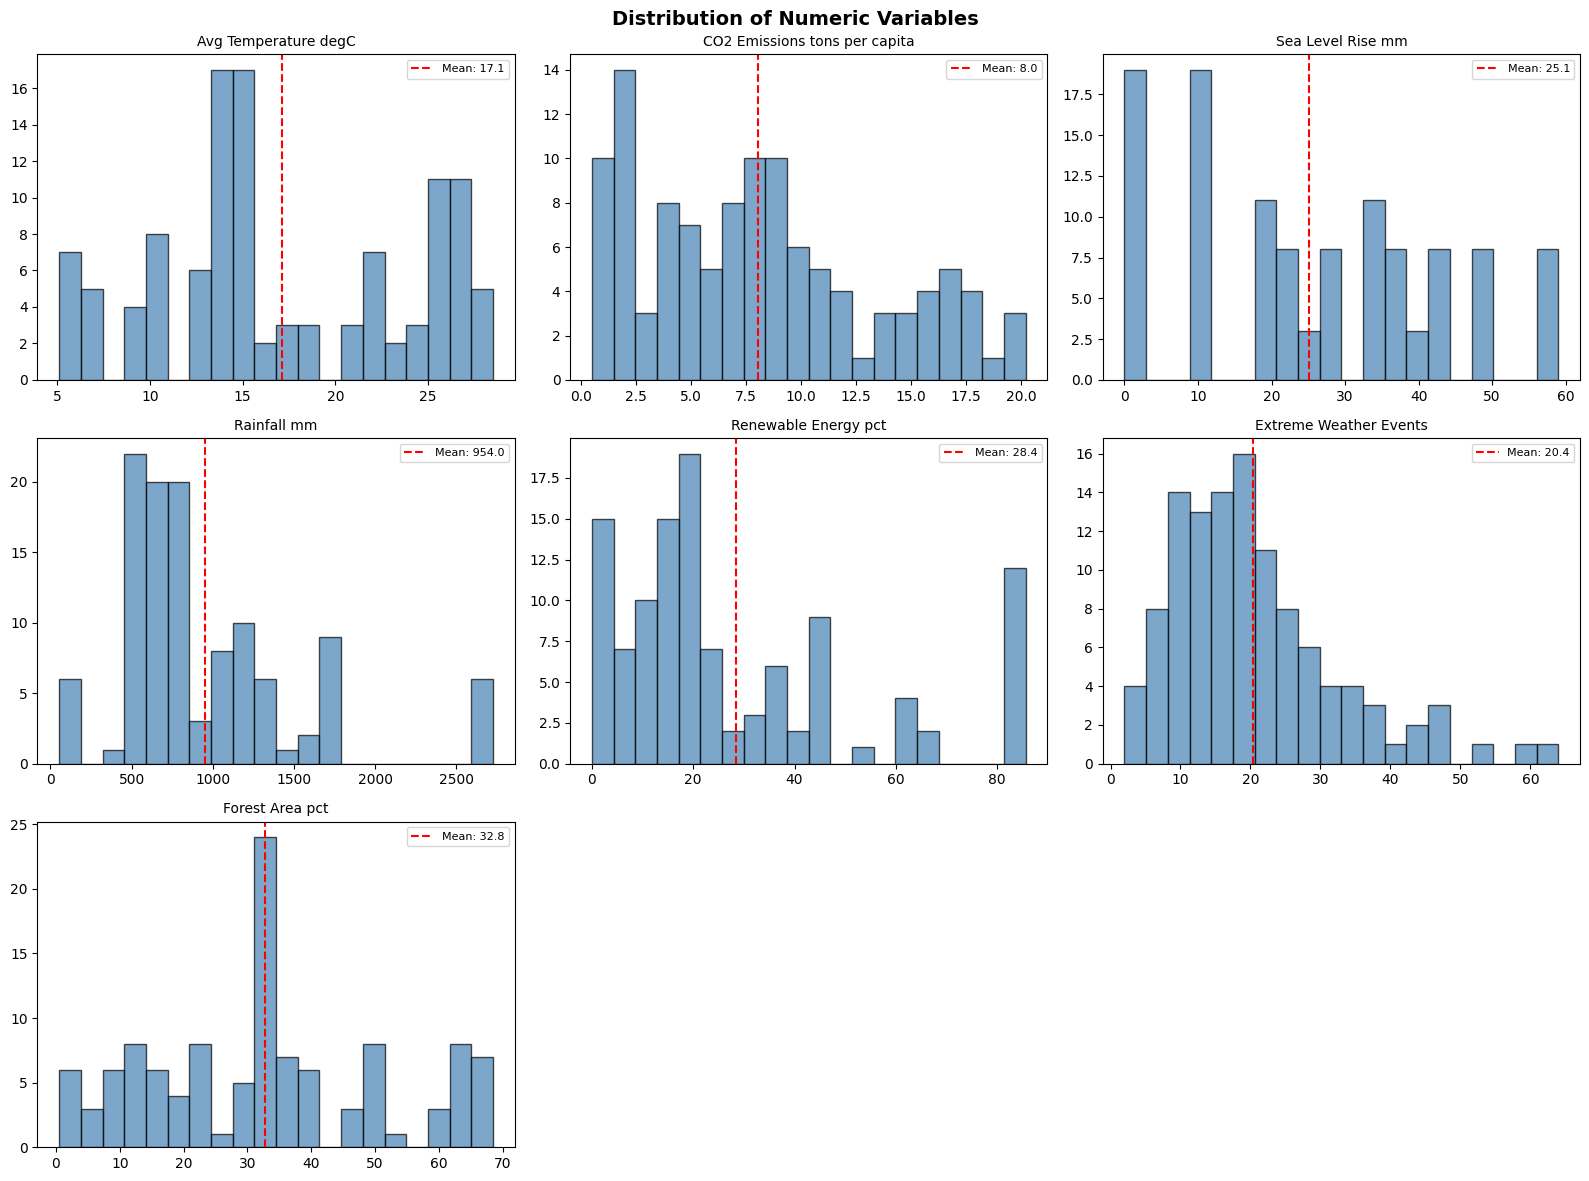

In [4]:
# Histograms of all numeric variables
numeric_cols = ["Avg_Temperature_degC", "CO2_Emissions_tons_per_capita", "Sea_Level_Rise_mm",
                "Rainfall_mm", "Renewable_Energy_pct", "Extreme_Weather_Events", "Forest_Area_pct"]

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    if col in df.columns:
        axes[i].hist(df[col].dropna(), bins=20, edgecolor="black", alpha=0.7, color="steelblue")
        axes[i].set_title(col.replace("_", " "), fontsize=10)
        axes[i].set_xlabel("")
        axes[i].axvline(df[col].mean(), color="red", linestyle="--", label=f"Mean: {df[col].mean():.1f}")
        axes[i].legend(fontsize=8)

# Hide unused subplots
for j in range(len(numeric_cols), len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Distribution of Numeric Variables", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

**What the histograms tell us:**

Each histogram shows how one variable is spread across all country-year records. The red dashed line marks the average (mean).

- **Symmetric shapes** (bell-like) mean most values cluster around the middle — this is common for temperature.
- **Skewed shapes** (tail stretching to one side) mean some records are much higher or lower than typical — common for population and CO2 emissions, where a few large countries dominate.
- **Wide spread** means the variable varies a lot across countries (e.g. rainfall ranges from desert-dry to tropical-wet).
- **Narrow spread** means most countries have similar values.

These distributions help decide which statistical tests are appropriate later. For example, heavily skewed data may need non-parametric tests (like Spearman instead of Pearson correlation).

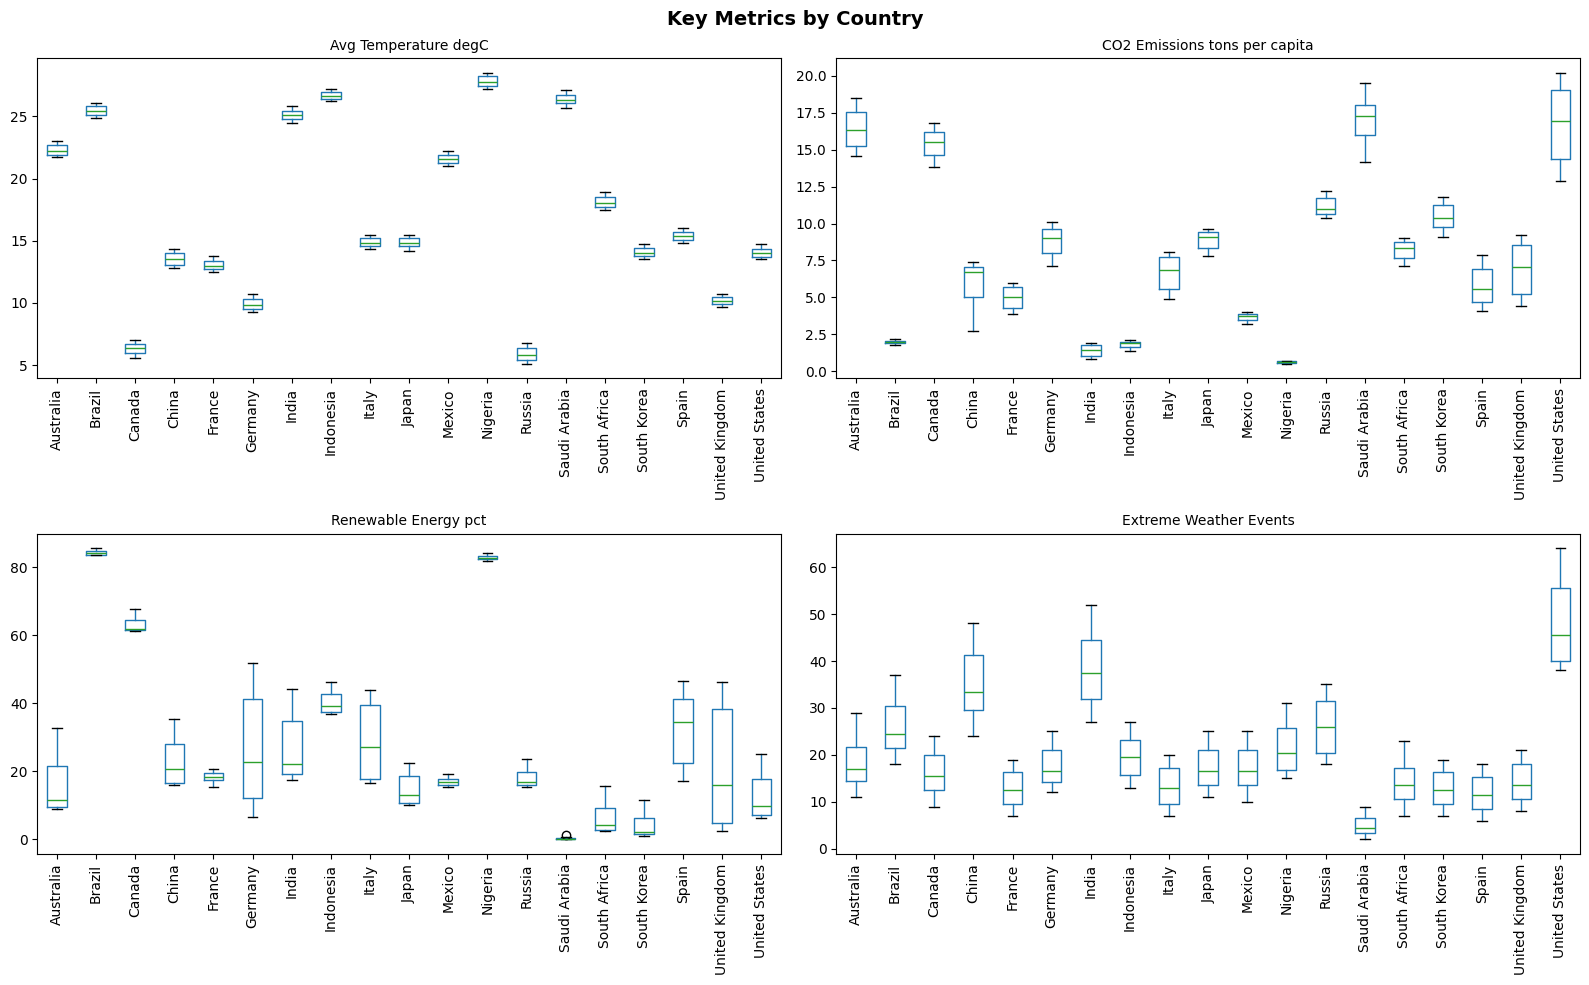

In [5]:
# Box plots of key metrics by country
key_metrics = ["Avg_Temperature_degC", "CO2_Emissions_tons_per_capita", 
               "Renewable_Energy_pct", "Extreme_Weather_Events"]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(key_metrics):
    if col in df.columns:
        df.boxplot(column=col, by="Country", ax=axes[i], rot=90, grid=False)
        axes[i].set_title(col.replace("_", " "), fontsize=10)
        axes[i].set_xlabel("")

plt.suptitle("Key Metrics by Country", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

**What the box plots tell us:**

Each box plot shows the range of values for one metric across all countries. The box itself covers the middle 50% of values (interquartile range). The line inside the box is the median. Dots outside the "whiskers" are outliers — unusually high or low values.

Key observations:
- **Temperature** varies widely by country, reflecting different climate zones (cold northern countries vs. tropical regions).
- **CO2 emissions** show large differences between developed and developing nations. Countries with heavy industry and fossil fuel dependence sit at the top.
- **Renewable energy** ranges from near-zero (fossil fuel-reliant countries) to very high (countries like Brazil with extensive hydropower).
- **Extreme weather events** show certain countries are disproportionately affected, likely due to geography and exposure to climate hazards.

These differences explain why we use per-country models in the prediction notebook rather than one global model.

# Trend checks (example)

**Exploring temperature trends over time:**

This visualization shows how global average temperature has changed from 2000 to 2024.

How to interpret the chart: an upward slope indicates a warming trend. Variability is normal due to natural climate cycles that cause year-to-year fluctuations. If the slope steepens in recent years, warming may be accelerating.

An important caveat is that this shows an average across all countries. Individual countries may show different patterns. The dashboard will allow users to explore country-specific trends.

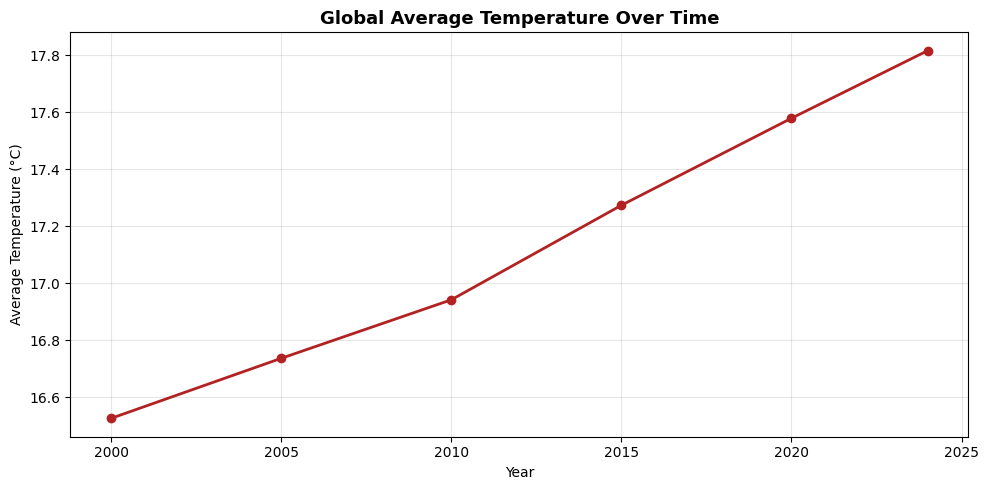

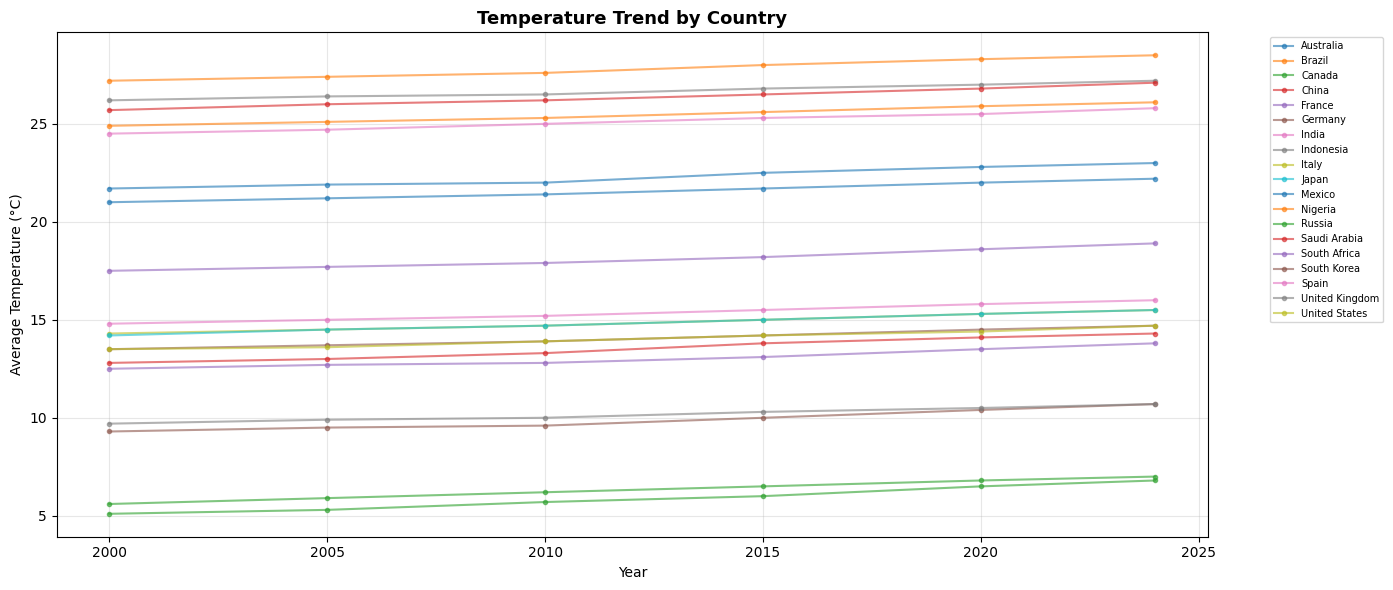

In [6]:
# Global average temperature trend over time
fig, ax = plt.subplots(figsize=(10, 5))
trend = df.groupby("Year")["Avg_Temperature_degC"].mean()
ax.plot(trend.index, trend.values, marker="o", linewidth=2, color="firebrick")
ax.set_title("Global Average Temperature Over Time", fontsize=13, fontweight="bold")
ax.set_xlabel("Year")
ax.set_ylabel("Average Temperature (°C)")
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Country-level temperature trends
fig, ax = plt.subplots(figsize=(14, 6))
for country, grp in df.groupby("Country"):
    ax.plot(grp["Year"], grp["Avg_Temperature_degC"], marker=".", alpha=0.6, label=country)
ax.set_title("Temperature Trend by Country", fontsize=13, fontweight="bold")
ax.set_xlabel("Year")
ax.set_ylabel("Average Temperature (°C)")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=7)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**What the trend charts show:**

The first chart shows the global average temperature across all countries for each year. An upward slope confirms that, on average, temperatures have been rising over the 2000–2024 period.

The second chart breaks this down by country. Each line represents one country's temperature trajectory. Key takeaways:
- Most countries show a warming trend, but the **rate of warming varies**. Some countries warm faster than others.
- Countries near the equator (e.g. Nigeria, Indonesia) start at higher baseline temperatures but may not warm as quickly.
- Countries at higher latitudes (e.g. Russia, Canada) may show steeper warming — consistent with the scientific observation that polar regions warm faster (Arctic amplification).
- Year-to-year fluctuations are normal and reflect natural climate variability (e.g. El Niño/La Niña cycles).

These country-level differences are exactly why the dashboard allows users to filter by country and why we build separate models per country in Notebook 04.

## Section 4 - Correlation scan

We scan numeric relationships to spot potential associations for later hypothesis tests.

# Correlation scan (example)

**Understanding correlations between environmental variables:**

A correlation heatmap shows how pairs of variables move together. Positive correlation (red) means when one increases, the other tends to increase. Negative correlation (blue) means when one increases, the other tends to decrease. No correlation (white) means variables move independently.

Values range from -1 to +1. Strong positive relationships range from 0.7 to 1.0. Moderate positive relationships range from 0.3 to 0.7. Weak or no relationship falls between -0.3 and 0.3. Moderate negative relationships range from -0.7 to -0.3. Strong negative relationships range from -1.0 to -0.7.

**Critical limitation about correlation and causation:**

Even strong correlations do not prove that one variable causes changes in another. Many factors influence climate. Historical emissions accumulate over decades. Local geography affects temperature through factors like coastal versus inland location and elevation. Policy changes take years to show effects. Economic development affects both emissions and energy transitions.

For responsible interpretation, we can say CO2 and temperature are associated, but we cannot claim CO2 emissions directly cause temperature changes in our simple analysis. More sophisticated climate science studies use complex models and controlled experiments to establish causal mechanisms.

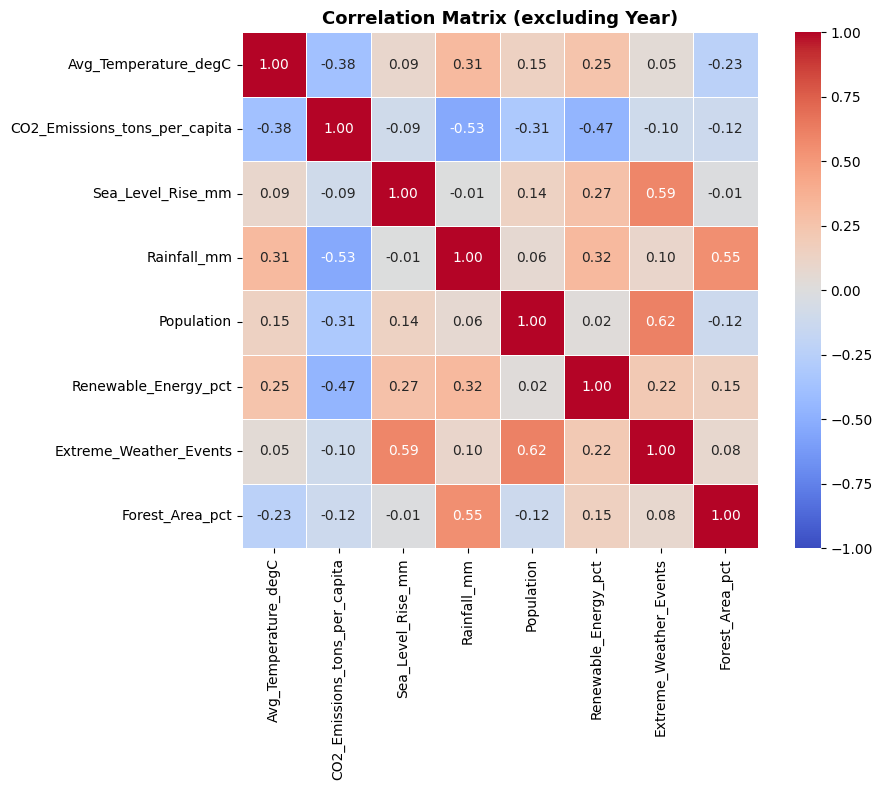

=== Notable Correlations (|r| > 0.3) ===
  Avg_Temperature_degC ↔ CO2_Emissions_tons_per_capita: r = -0.377 (Moderate negative)
  Avg_Temperature_degC ↔ Rainfall_mm: r = 0.314 (Moderate positive)
  CO2_Emissions_tons_per_capita ↔ Rainfall_mm: r = -0.532 (Moderate negative)
  CO2_Emissions_tons_per_capita ↔ Population: r = -0.315 (Moderate negative)
  CO2_Emissions_tons_per_capita ↔ Renewable_Energy_pct: r = -0.467 (Moderate negative)
  Sea_Level_Rise_mm ↔ Extreme_Weather_Events: r = 0.588 (Moderate positive)
  Rainfall_mm ↔ Renewable_Energy_pct: r = 0.325 (Moderate positive)
  Rainfall_mm ↔ Forest_Area_pct: r = 0.552 (Moderate positive)
  Population ↔ Extreme_Weather_Events: r = 0.615 (Moderate positive)


In [7]:
# Correlation heatmap (exclude Year to avoid spurious correlations with trending variables)
numeric_for_corr = [c for c in df.select_dtypes(include="number").columns if c != "Year"]
corr = df[numeric_for_corr].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, 
            square=True, linewidths=0.5, ax=ax,
            vmin=-1, vmax=1)
ax.set_title("Correlation Matrix (excluding Year)", fontsize=13, fontweight="bold")
plt.tight_layout()
plt.show()

# Highlight strong correlations
print("=== Notable Correlations (|r| > 0.3) ===")
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        r = corr.iloc[i, j]
        if abs(r) > 0.3:
            strength = "Strong" if abs(r) > 0.7 else "Moderate"
            direction = "positive" if r > 0 else "negative"
            print(f"  {corr.columns[i]} ↔ {corr.columns[j]}: r = {r:.3f} ({strength} {direction})")

**What the correlation heatmap reveals:**

The heatmap colour-codes how strongly each pair of variables moves together. Red means they tend to increase together (positive correlation); blue means when one increases the other tends to decrease (negative correlation); white means little or no relationship.

Key findings to look for:
- **CO2 emissions vs. temperature**: If positive (red), higher-emitting countries tend to be warmer. But this may reflect geography (cold industrial nations vs. warm developing nations), not a causal link.
- **Renewable energy vs. CO2**: A negative value (blue) suggests countries using more renewables tend to have lower emissions — supporting the idea that energy transition helps.
- **Extreme events patterns**: Check how extreme weather relates to other factors. Weak correlations suggest extreme events are driven by complex climate systems, not a single factor.

Year was deliberately excluded from the matrix because many environmental variables trend upward over time simply due to global change. Including Year would create misleading "spurious" correlations where two unrelated things both happen to increase over the same period.

The "notable correlations" printed below the chart flag any pair with |r| > 0.3, which is the threshold for a meaningful (moderate to strong) association.

**Remember:** Even strong correlations do not prove causation. Formal hypothesis tests in Notebook 03 will assess statistical significance.

## Summary

**Key findings from EDA:**

1. **Distributions:** Most environmental variables show considerable variation across countries, reflecting differences in geography, development level, and climate zones.
2. **Temperature trends:** Global average temperature shows an upward trend over the 2000-2024 period. Country-level patterns vary but most show warming.
3. **Country differences:** Box plots reveal wide ranges in CO2 emissions and renewable energy adoption. Developed nations tend to have higher per-capita emissions while some developing nations lead in renewable energy share.
4. **Correlations:** Notable associations exist between several variable pairs (see heatmap). Year was excluded from the correlation matrix to avoid spurious correlations with trending variables.

**Next step:** Formal hypothesis testing in Notebook 03 to determine statistical significance of these observed patterns.